In [ ]:
from sklearn.cluster import kmeans_plusplus
import pandas as pd
import numpy as np

In [ ]:
# 载入数据

# 原始数据
# jiasu = pd.read_excel("E://All Files//temp//数据0//20210125.xlsx",sheet_name="Sheet1")
# jiasubianhua = pd.read_csv("E://All Files//temp//数据0//原始加速变化率.CSV")
# # 归一化
# jiasu['Throttle'] = (jiasu['Throttle']-jiasu['Throttle'].min())/(jiasu['Throttle'].max()-jiasu['Throttle'].min())
# jiasubianhua = (jiasubianhua-jiasubianhua.min())/(jiasubianhua.max()-jiasubianhua.min())

# 滤波后少量数据
jiasu = pd.read_csv("E://All Files//temp//数据0//加速.CSV")
jiasubianhua = pd.read_csv("E://All Files//temp//数据0//加速变化率.CSV")
# 归一化
jiasu = (jiasu-jiasu.min())/(jiasu.max()-jiasu.min())
jiasubianhua = (jiasubianhua-jiasubianhua.min())/(jiasubianhua.max()-jiasubianhua.min())

In [ ]:
# 训练数据
data = np.array(list(zip(jiasu['0'],jiasubianhua['0'])))
centers, indices = kmeans_plusplus(data, n_clusters=3, random_state=0)

In [ ]:
centers

### 计算每个点到所有中心的距离

In [ ]:
distance = []
for i in data:
    temp_dis = []
    for center in centers:
        temp_dis.append(((i[0]-center[0])**2+(i[1]-center[1])**2)**0.5)
    distance.append(temp_dis)

In [ ]:
distance[0:5]

### 分类并赋予颜色值

In [ ]:
colour_class = []
for i in distance:
    if min(i)==i[0]:
        colour_class.append(0.1)
    if min(i)==i[1]:
        colour_class.append(0.5)
    if min(i)==i[2]:
        colour_class.append(0.9)
colour_class

### 可视化

#### 点群分布

In [ ]:
list(zip(centers[0],centers[1],centers[2]))

In [ ]:
import matplotlib.pyplot as plt

colour = 0.1
plt.scatter(jiasu['0'], jiasubianhua['0'], 5, c=colour_class,cmap=plt.get_cmap("jet"))
plt.scatter(list(zip(centers[0],centers[1],centers[2]))[0],list(zip(centers[0],centers[1],centers[2]))[1],50)
plt.colorbar()              # 生成右边的颜色条
plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 1.1))
plt.show()

X，Y，到中心点距离Z

In [ ]:
%matplotlib tk
import matplotlib.pyplot as plt
ax = plt.subplot(111,projection='3d')
colour = 0.1

ax.scatter3D(jiasu['0'],jiasubianhua['0'],np.array(distance).T[0])

plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 1.1))
plt.show()

In [ ]:
%matplotlib tk
import matplotlib.pyplot as plt
ax = plt.subplot(projection='3d')
colour = 0.1

ax.scatter3D(jiasu['0'],jiasubianhua['0'],np.array(distance).T[1])

plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 1.1))
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.subplot(projection='3d')
colour = 0.1

ax.scatter3D(jiasu['0'],jiasubianhua['0'],np.array(distance).T[2])

plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 1.1))
plt.show()

#### 欧式距离直方图

In [ ]:
for dis2center in np.array(distance).T:
    print(dis2center.argsort())

In [ ]:
np.array(distance).T

将距离和点数据合并

In [ ]:
data_dis = [[list(a),b] for a,b in zip(data,distance)]

In [ ]:
data_dis[0]

将点按照距离排序https://www.osgeo.cn/matplotlib/gallery/mplot3d/hist3d.html

In [ ]:
pd.cut(np.array(distance).T[0],10).value_counts()

In [ ]:
hist, xedges, yedges = np.histogram2d(jiasu['0'],jiasubianhua['0'], bins=4, range=[[0, 1], [0, 1]])
hist

In [ ]:
xedges

In [ ]:
xpos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(jiasu['0'],jiasubianhua['0'], bins=5, range=[[0, 1], [0, 1]])

# 生成网格坐标点，加0.5是为了柱状图绘制在中间而不是点上
xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="xy")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# dx,dy控制柱子大小，dz控制高度（这里是数量）
dx = dy = 0.15 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show

### 汇总

In [7]:
%matplotlib inline
from sklearn.cluster import kmeans_plusplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def Kmeans(*args):
    # 归一化
    args_format = list(map(lambda arg:(arg-arg.min())/(arg.max()-arg.min()),args))

    # 训练数据
    data = np.array(list(zip(*args_format)))
    # 中心点和中心点标签
    centers, indices = kmeans_plusplus(data, n_clusters=3, random_state=0)
    
    # 计算距离
    distance = []
    for i in data:
        temp_dis = []
        # 每个点到所有中心的距离
        for center in centers:
            temp_dis.append(((i[0]-center[0])**2+(i[1]-center[1])**2)**0.5)
        distance.append(temp_dis)
#     print(distance)
    # 计算每个点的分类值并赋予颜色值
    colour_class = []
    for i in distance:
        if min(i)==i[0]:
            colour_class.append(0.1)
            continue
        if min(i)==i[1]:
            colour_class.append(0.5)
            continue
        if min(i)==i[2]:
            colour_class.append(0.9)
            continue
    # 绘图
    fig = plt.figure(figsize=(9,9))      # 设置画布大小
    # 若输入数据为二维，则二维绘图
    if len(args_format) == 2:
        # 绘制聚类颜色可视化图
        ax1 = plt.subplot(221)
        ax1.scatter(*list(args_format), 5, c=colour_class,cmap=plt.get_cmap("jet"))
        ax1.scatter(list(zip(centers[0],centers[1],centers[2]))[0],list(zip(centers[0],centers[1],centers[2]))[1],50)
#         plt.colorbar()              # 生成右边的颜色条
        plt.xlim((-0.1, 1.1))
        plt.ylim((-0.1, 1.1))
        # 绘制三维图，高度为到中心点的距离
        for i in range(0,len(centers)):
            # 2，2表示有2行2列个子图，第三个参数表示绘制在第几个位置
            plt.subplot(2,2,i+2,projection='3d')
            # 获取当前子图ax
            temp_ax = plt.gca()
            temp_ax.scatter3D(*list(args_format),np.array(distance).T[i])
            plt.xlim((-0.1, 1.1))
            plt.ylim((-0.1, 1.1))
        # 绘制柱状图
        fig2 = plt.figure(figsize=(5,5))      # 设置画布大小
        fig2.add_subplot(111,projection='3d')
        temp_ax = plt.gca()
        hist, xedges, yedges = np.histogram2d(*list(args_format), bins=10, range=[[0, 1], [0, 1]])
        # 生成网格坐标点，加0.5是为了柱状图绘制在中间而不是点上
        xpos, ypos = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="xy")
        xpos = xpos.ravel()
        ypos = ypos.ravel()
        zpos = 0
        # dx,dy控制柱子大小，dz控制高度（这里是数量）
        dx = dy = 0.15 * np.ones_like(zpos)
        dz = hist.ravel()
        temp_ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    elif len(args_format) == 3:
        # 绘制三维散点图
        ax = plt.subplot(2,2,1,projection='3d')
        plt.xlabel('x')
        plt.ylabel('y')

        # 获取当前子图ax
        ax.scatter3D(*list(args_format))

加速与加速变化率

In [2]:
# 滤波后少量数据
jiasu = pd.read_csv("C://Users//60234//Desktop//新建文件夹 (2)//加速.CSV")
jiasubianhua = pd.read_csv("C://Users//60234//Desktop//新建文件夹 (2)//加速变化率.CSV")
Kmeans(jiasu['0'],jiasubianhua['0'])

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/60234/Desktop/新建文件夹 (2)/加速.CSV'

制动与制动变化率

In [ ]:
# 滤波后少量数据
jiasu = pd.read_csv("E://All Files//temp//数据0//制动.CSV")
jiasubianhua = pd.read_csv("E://All Files//temp//数据0//制动变化率.CSV")
Kmeans(jiasu['0'],jiasubianhua['0'])

转向与转向变化率

In [ ]:
# 滤波后少量数据
jiasu = pd.read_csv("E://All Files//temp//数据0//转角.CSV")
jiasubianhua = pd.read_csv("E://All Files//temp//数据0//转角变化率.CSV")
Kmeans(jiasu['0'],jiasubianhua['0'])

转向，制动，转向变化  !!!维度有问题！！！

In [ ]:
zhuanxiang.shape,zhuanxiangbianhua.shape,zhidong.shape

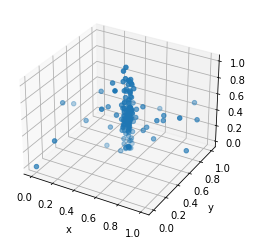

In [6]:
# 滤波后少量数据
zhuanxiang = pd.read_csv("E://All Files//temp//数据0//转角.CSV")
zhuanxiangbianhua = pd.read_csv("E://All Files//temp//数据0//转角变化率.CSV")
zhidong = pd.read_csv("E://All Files//temp//数据0//制动.CSV")
Kmeans(zhuanxiang['0'][0:169],zhuanxiangbianhua['0'][0:169],zhidong['0'])

转向，制动，加速

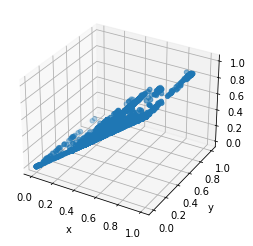

In [8]:
Kmeans(data['转向'],data['制动'],data['转向'])

新数据

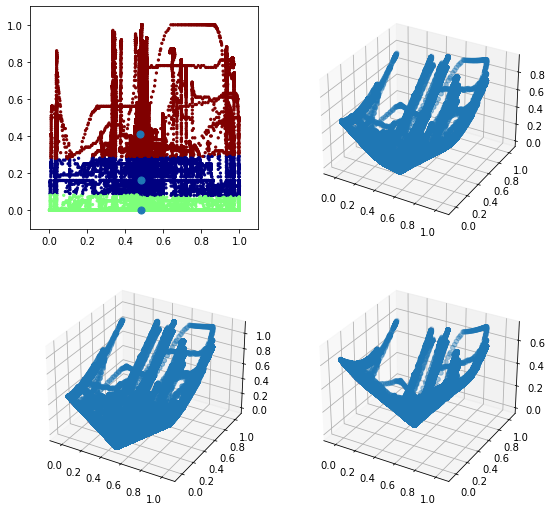

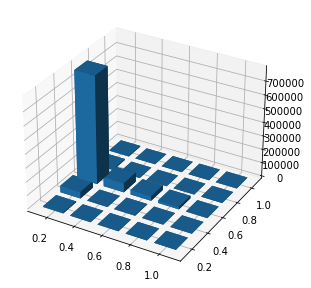

In [4]:
# 滤波后少量数据
data = pd.read_excel("E:\\All Files\\temp\\数据0\\raw_data\\alldata.xlsx")
Kmeans(data['转向'],data['制动'])

改进后数据

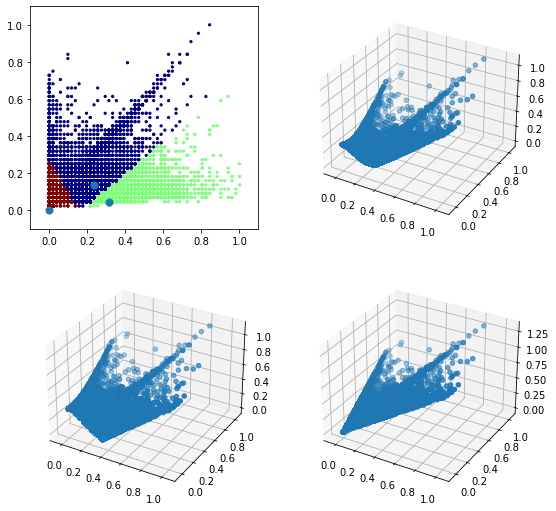

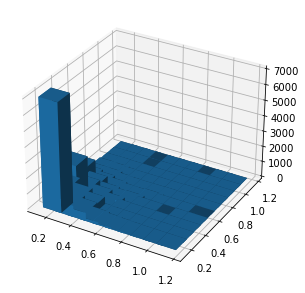

In [6]:

data = pd.read_excel("C://Users//60234//Desktop//新建文件夹 (2)//improved_data.xlsx")
Kmeans(data['油门'],data['油门变化'])

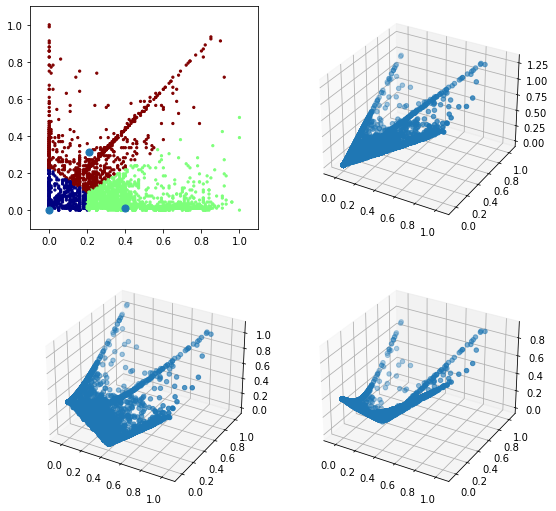

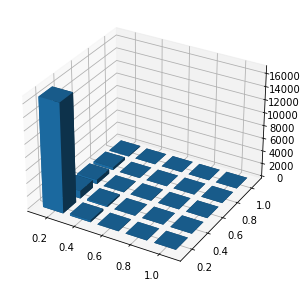

In [13]:
data = pd.read_excel("E:\\All Files\\temp\\数据0\\raw_data\\improved_data.xlsx")
Kmeans(data['制动'],data['制动变化'])

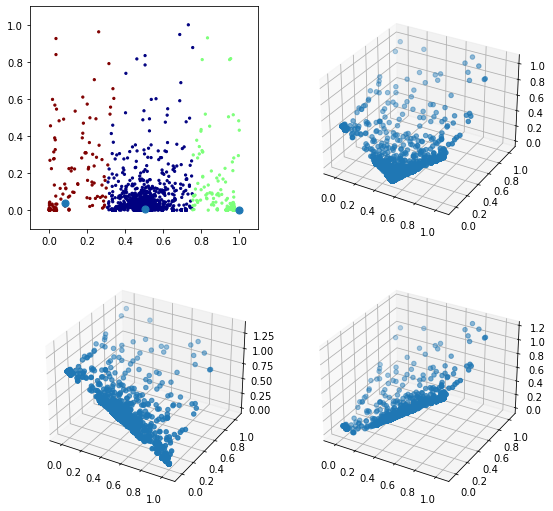

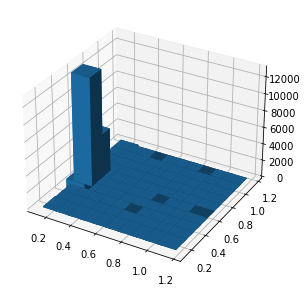

In [11]:
data = pd.read_excel("E:\\All Files\\temp\\数据0\\raw_data\\improved_data.xlsx")
Kmeans(data['转向'],data['转向变化'])

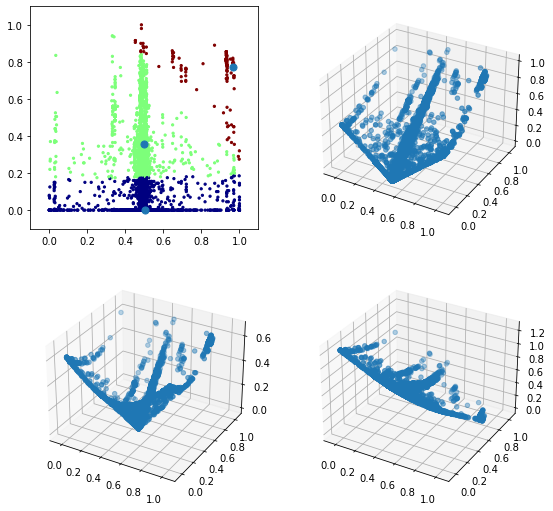

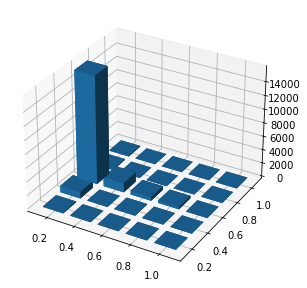

In [9]:
data = pd.read_excel("E:\\All Files\\temp\\数据0\\raw_data\\improved_data.xlsx")
Kmeans(data['转向'],data['制动'])

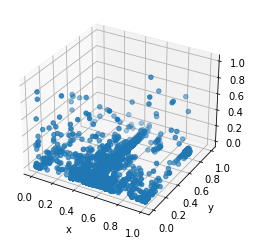

In [18]:
%matplotlib inline
data = pd.read_excel("E:\\All Files\\temp\\数据0\\raw_data\\improved_data.xlsx")
Kmeans(data['转向'],data['制动'],data['转向变化'])

In [2]:
%matplotlib inline
from sklearn.cluster import kmeans_plusplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def Kmeans(*args):
    # 归一化
    args_format = list(map(lambda arg:(arg-arg.min())/(arg.max()-arg.min()),args))

    # 训练数据
    data = np.array(list(zip(*args_format)))
    # 中心点和中心点标签
    centers, indices = kmeans_plusplus(data, n_clusters=3, random_state=0)
    print(centers)
    # 计算距离
    distance = []
    for i in data:
        temp_dis = []
        # 每个点到所有中心的距离
        for center in centers:
            temp_dis.append(((i[0]-center[0])**2+(i[1]-center[1])**2)**0.5)
        distance.append(temp_dis)
#     print(distance)
    # 计算每个点的分类值并赋予颜色值
    cluster_class = [[],[],[]]
    for i in distance:
        if min(i)==i[0]:
            cluster_class[0].append(min(i)) 
            continue
        if min(i)==i[1]:
            cluster_class[1].append(min(i)) 
            continue
        if min(i)==i[2]:
            cluster_class[2].append(min(i)) 
            continue
    return(cluster_class)

In [5]:
data = pd.read_excel("E:\\All Files\\temp_data\\数据0\\raw_data\\improved_data.xlsx")
cluster_class = Kmeans(data['转向'],data['制动'],data['油门'])

[[0.50191939 0.         0.23529412]
 [0.48176583 0.83       0.        ]
 [0.53646833 0.         0.        ]]


In [4]:
cluster_class[0]

[0.020153550863723668,
 0.020153550863723668,
 0.020153550863723668,
 0.020153550863723668,
 0.020153550863723668,
 0.020153550863723668,
 0.020153550863723668,
 0.020153550863723668,
 0.020153550863723668,
 0.026871401151631558,
 0.029750479846449185,
 0.16092982131573474,
 0.017274472168905985,
 0.012476007677543255,
 0.014395393474088358,
 0.017274472168905985,
 0.017274472168905985,
 0.017274472168905985,
 0.026871401151631558,
 0.025911708253358978,
 0.026871401151631558,
 0.026871401151631558,
 0.025911708253358978,
 0.023992322456813875,
 0.04928396709981147,
 0.0554583766159066,
 0.0632942778805217,
 0.1115010528008463,
 0.1514786092560711,
 0.021113243761996192,
 0.021113243761996192,
 0.020153550863723668,
 0.023992322456813875,
 0.03838771593090218,
 0.10595700831439002,
 0.16777272197090007,
 0.18346643789698608,
 0.24856046065259124,
 0.2879078694817659,
 0.253358925143954,
 0.09884836852207302,
 0.0374280230326296,
 0.023992322456813875,
 0.021113243761996192,
 0.02015355

In [7]:
re = pd.cut(cluster_class[2],20)
re.value_counts()/sum(re.value_counts())

(-0.000611, 0.0305]    0.384501
(0.0305, 0.0611]       0.050671
(0.0611, 0.0916]       0.049180
(0.0916, 0.122]        0.047690
(0.122, 0.153]         0.026826
(0.153, 0.183]         0.068554
(0.183, 0.214]         0.026826
(0.214, 0.244]         0.040238
(0.244, 0.275]         0.034277
(0.275, 0.305]         0.023845
(0.305, 0.336]         0.037258
(0.336, 0.366]         0.034277
(0.366, 0.397]         0.032787
(0.397, 0.428]         0.038748
(0.428, 0.458]         0.032787
(0.458, 0.489]         0.055142
(0.489, 0.519]         0.008942
(0.519, 0.55]          0.002981
(0.55, 0.58]           0.000000
(0.58, 0.611]          0.004471
dtype: float64

In [8]:
list(re.value_counts()/sum(re.value_counts()))

[0.38450074515648286,
 0.05067064083457526,
 0.04918032786885246,
 0.04769001490312966,
 0.026825633383010434,
 0.06855439642324888,
 0.026825633383010434,
 0.040238450074515646,
 0.03427719821162444,
 0.02384500745156483,
 0.037257824143070044,
 0.03427719821162444,
 0.03278688524590164,
 0.038748137108792845,
 0.03278688524590164,
 0.05514157973174367,
 0.00894187779433681,
 0.0029806259314456036,
 0.0,
 0.004470938897168405]

In [9]:
list(np.linspace(0.05,1,20))

[0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.39999999999999997,
 0.44999999999999996,
 0.49999999999999994,
 0.5499999999999999,
 0.6,
 0.65,
 0.7,
 0.75,
 0.7999999999999999,
 0.85,
 0.9,
 0.95,
 1.0]

韦伯

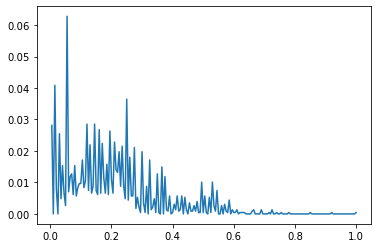

In [23]:
num = 200
plt.plot([i/num for i in range(1,num+1)],pd.cut(cluster_class[1],num).value_counts()/sum(pd.cut(cluster_class[1],num).value_counts()))

In [3]:
temp = 0
ls = []
for i in re.value_counts()/sum(re.value_counts()):
    temp+=i
    ls.append(temp)
num = 20
plt.plot([i/num for i in range(1,num+1)],ls)

NameError: name 're' is not defined

拟合https://blog.csdn.net/weixin_40888966/article/details/115307176

In [106]:
list(np.linspace(0.00001,1,endpoint=True,num=40))

[1e-05,
 0.02565076923076923,
 0.051291538461538465,
 0.07693230769230769,
 0.10257307692307692,
 0.12821384615384618,
 0.1538546153846154,
 0.1794953846153846,
 0.20513615384615386,
 0.2307769230769231,
 0.25641769230769235,
 0.28205846153846154,
 0.3076992307692308,
 0.33334,
 0.3589807692307692,
 0.38462153846153846,
 0.4102623076923077,
 0.43590307692307695,
 0.4615438461538462,
 0.4871846153846154,
 0.5128253846153846,
 0.5384661538461538,
 0.564106923076923,
 0.5897476923076923,
 0.6153884615384615,
 0.6410292307692307,
 0.66667,
 0.6923107692307692,
 0.7179515384615384,
 0.7435923076923077,
 0.7692330769230769,
 0.7948738461538462,
 0.8205146153846153,
 0.8461553846153845,
 0.8717961538461538,
 0.897436923076923,
 0.9230776923076923,
 0.9487184615384615,
 0.9743592307692307,
 1.0]

In [99]:
ls

[0.1556671449067432,
 0.5005738880918221,
 0.7263988522238164,
 0.8137733142037303,
 0.8661406025824965,
 0.9157819225251077,
 0.9466284074605453,
 0.9648493543758968,
 0.978048780487805,
 0.9842180774748925,
 0.9913916786226687,
 0.9942611190817793,
 0.9964131994261122,
 0.9979913916786229,
 0.9985652797704451,
 0.9992826398852227,
 0.9995695839311337,
 0.9997130559540892,
 0.9998565279770447,
 0.99999]

In [95]:
from scipy.stats import exponweib
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

def Cal_Weibull_CDF(data):
    X = np.log(np.linspace(0.0000001,1,endpoint=True,num=20))
    print(X)
    Y = np.log(-np.log(1.0-np.array(data))) # Y = ln[-ln[1-F(x)]]
    print(Y)
    coef = np.polyfit(X,Y,1)
    a = coef[0]
    b = math.exp(-coef[1]/a)
    print(a,b)
#     fcdf = lambda x: 1-np.exp(-np.power(x/b,a))
    pdf = lambda x: (a/b)*(np.power(x/b,a-1))*np.exp(-np.power(x/b,a))
    return fcdf

In [10]:
list(np.linspace(0.001,1,endpoint=True,num=20))

[0.001,
 0.05357894736842105,
 0.1061578947368421,
 0.15873684210526315,
 0.2113157894736842,
 0.26389473684210524,
 0.3164736842105263,
 0.36905263157894735,
 0.4216315789473684,
 0.47421052631578947,
 0.5267894736842105,
 0.5793684210526315,
 0.6319473684210526,
 0.6845263157894736,
 0.7371052631578947,
 0.7896842105263158,
 0.8422631578947368,
 0.8948421052631579,
 0.9474210526315789,
 1.0]

In [74]:
ls[-1] = 0.99999

[0.1556671449067432,
 0.5005738880918221,
 0.7263988522238164,
 0.8137733142037303,
 0.8661406025824965,
 0.9157819225251077,
 0.9466284074605453,
 0.9648493543758968,
 0.978048780487805,
 0.9842180774748925,
 0.9913916786226687,
 0.9942611190817793,
 0.9964131994261122,
 0.9979913916786229,
 0.9985652797704451,
 0.9992826398852227,
 0.9995695839311337,
 0.9997130559540892,
 0.9998565279770447,
 0.99999]

In [97]:
weib = Cal_Weibull_CDF(ls)

[-16.11809565  -2.94443718  -2.25129095  -1.84582616  -1.55814424
  -1.33500079  -1.15267929  -0.99852866  -0.8649973   -0.74721429
  -0.6418538   -0.54654363  -0.45953227  -0.37948958  -0.30538161
  -0.23638875  -0.17185024  -0.11122562  -0.05406722   0.        ]
[-1.77662369 -0.36485745  0.25934733  0.51926428  0.69861486  0.90597599
  1.07516509  1.20839669  1.33997095  1.42284086  1.55920215  1.64103174
  1.7281973   1.82621133  1.87897415  1.9796119   2.04779067  2.09878123
  2.18034633  2.44347036]
0.24274093098005028 0.0012089183023105514


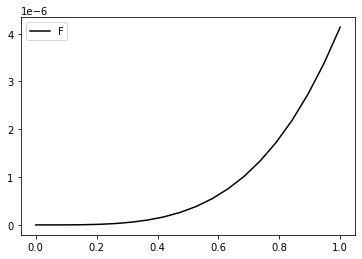

In [98]:
x = np.linspace(0,1,num=20,endpoint=True)

y2 = weib(x)

plt.figure()

plt.plot(x,y2,color='black',label='F')
plt.legend()
plt.show()
